#Bùi Quang Hậu_19144255_Money_CNN

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
url='../input/money-cnn/money_train'

In [ ]:
generator= ImageDataGenerator(rescale=1./255,validation_split=0.15,rotation_range=0.1,width_shift_range=0.1,zoom_range=0.1)
train_data=generator.flow_from_directory(url,target_size=(150,150),batch_size=16,class_mode='categorical',subset='training')
validation_dataset=generator.flow_from_directory(url,target_size=(150,150),batch_size=16,class_mode='categorical',subset='validation')

Found 310 images belonging to 9 classes.
Found 48 images belonging to 9 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) #size:32x32, 3 kenh mau
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 75, 75, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 360000)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               92160256  
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)              

In [ ]:
opt=SGD(learning_rate=0.001,momentum=0.9)
model.compile (optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_data,epochs=20,batch_size=16,validation_data=validation_dataset,verbose=1)
score=model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là:',score[0])
print('Độ chính xác kiểm tra là:',score[1])

Epoch 1/20
20/20 [==============================] - 80s 4s/step - loss: 3.3321 - accuracy: 0.2000 - val_loss: 2.0220 - val_accuracy: 0.2500
Epoch 2/20
20/20 [==============================] - 71s 4s/step - loss: 1.8948 - accuracy: 0.3065 - val_loss: 1.5147 - val_accuracy: 0.6042
Epoch 3/20
20/20 [==============================] - 74s 4s/step - loss: 1.5421 - accuracy: 0.4742 - val_loss: 1.2481 - val_accuracy: 0.6875
Epoch 4/20
20/20 [==============================] - 76s 4s/step - loss: 1.1103 - accuracy: 0.6194 - val_loss: 0.9569 - val_accuracy: 0.6667
Epoch 5/20
20/20 [==============================] - 71s 4s/step - loss: 0.8554 - accuracy: 0.7387 - val_loss: 1.0938 - val_accuracy: 0.5833
Epoch 6/20
20/20 [==============================] - 74s 4s/step - loss: 0.6833 - accuracy: 0.7871 - val_loss: 0.3976 - val_accuracy: 0.9167
Epoch 7/20
20/20 [==============================] - 75s 4s/step - loss: 0.5042 - accuracy: 0.8419 - val_loss: 0.5992 - val_accuracy: 0.8750
Epoch 8/20
20/20 [==

In [ ]:
validation_dataset.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200k': 3,
 '20k': 4,
 '2k': 5,
 '500k': 6,
 '50k': 7,
 '5k': 8}

Found 4 images belonging to 1 classes.


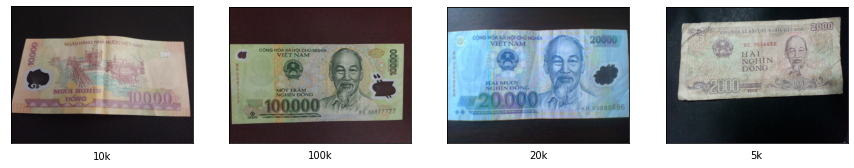

In [ ]:

from tensorflow.keras.utils import load_img, img_to_array
import os
import matplotlib.pyplot as plt
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
datagenerator=datagen.flow_from_directory('../input/testmoney',
                                          target_size=(150,150),batch_size=5,
                                          interpolation="lanczos",shuffle=False)
money={0:'100k',
 1:'10k',
 2:'1k',
 3:'200k',
 4:'20k',
 5:'2k',
 6:'500k',
 7:'50k',
 8:'5k'}
plt.figure(figsize=(15,15))   #chiều dài với rộng của khung ảnh
for i in range(len(datagenerator.filenames)):
    plt.subplot(1,4,i+1)      #kích thước của khung ảnh, 8: dài, 5 rộng, chỗ số 8 để lớn hơn ko sao, nhưng nhớ 8*5 phải lớn hơn số ảnh test
    plt.imshow(load_img(datagenerator.filepaths[i]))
    plt.xticks([])
    plt.yticks([])
    img=load_img('../input/testmoney/'+datagenerator.filenames[i],target_size=(150,150)) #nhớ có cái / này nha
    img=img_to_array(img)
    img=img.reshape(1,150,150,3)
    img=img.astype('float')
    img/=255
    plt.xlabel(money[np.argmax(model.predict(img))])  #tên model lúc mà chạy xong á (model_1)
plt.show()

In [ ]:
model.save('./final_money.h5')